In [ ]:
import numpy as np
from AI_labs import decision_surface, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

#**1. Знайомство з набором даних і його розбиття на навчальну і тестову вибірки**

(array([0, 1, 2, 3]), array([392, 291, 205, 112]))


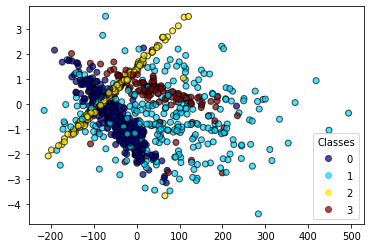

In [ ]:
data=np.genfromtxt('points2D_4classes.csv',delimiter=',',skip_header=1)
X=np.array(data[:,:2])
y=np.array(data[:,2]).astype(int)
print (np.unique(y, return_counts=1))
decision_surface(X=X,y=y)

#**2. Розбиття набору даних на навчальну і тестову вибірки**

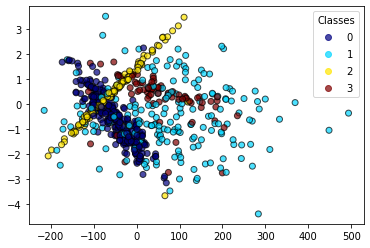

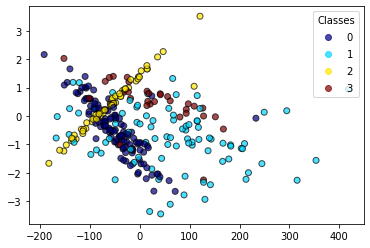

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
decision_surface(X=X_train,y=y_train)
decision_surface(X=X_test,y=y_test)

#**3. Побудова класифікатора на основі машини опорних векторів**

CPU times: user 27.3 ms, sys: 0 ns, total: 27.3 ms
Wall time: 28.4 ms


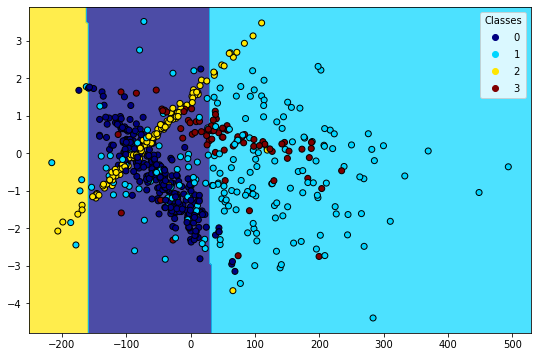

Точність класифікатора: 0.5742857142857143
Навчальна вибірка: 0.5742857142857143
Тестова вибірка: 0.5466666666666666


In [ ]:
clf=SVC()
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

#**4. Стандартизація даних**

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
print(scaler.mean_, scaler.scale_)

[-5.65249822 -0.26298346] [100.44242189   1.16145681]


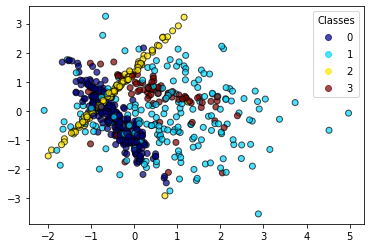

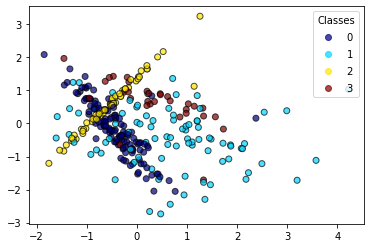

In [ ]:
scaler.transform(X_train, copy=False)
scaler.transform(X_test, copy=False)
decision_surface(X=X_train,y=y_train)
decision_surface(X=X_test,y=y_test)

In [ ]:
print(X_train.mean(axis=0), X_train.std(axis=0))
print(X_test.mean(axis=0), X_test.std(axis=0))

[-5.01186394e-17  1.90641154e-16] [1. 1.]
[-0.04763587 -0.01810523] [0.95157917 0.92514752]


CPU times: user 27.7 ms, sys: 0 ns, total: 27.7 ms
Wall time: 27.7 ms


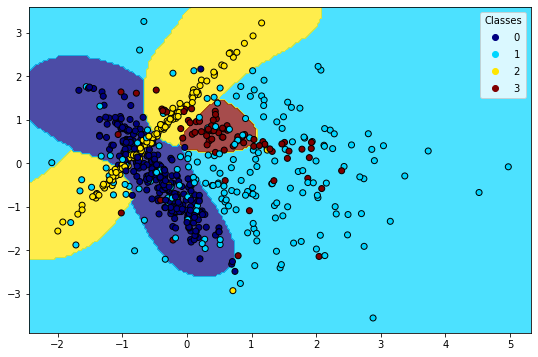

Точність класифікатора: 0.7371428571428571
Навчальна вибірка: 0.7371428571428571
Тестова вибірка: 0.73


In [ ]:
clf=SVC()
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

#**5. Дослідження основних гіперпараметрів SVC**

CPU times: user 75.8 ms, sys: 0 ns, total: 75.8 ms
Wall time: 148 ms


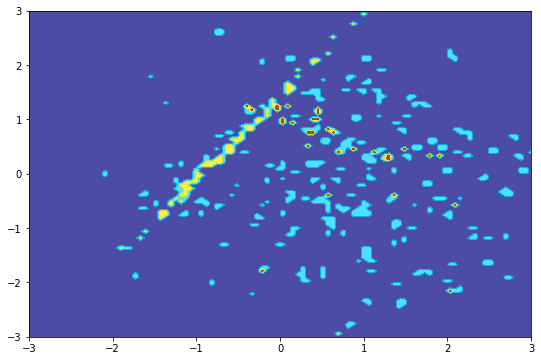

Точність класифікатора: 0.9671428571428572
Навчальна вибірка: 0.9671428571428572
Тестова вибірка: 0.51


In [ ]:
clf=SVC(C=1, gamma=1000)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X=None, y=y_train, meshgrid_dims=100)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')
print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

CPU times: user 149 ms, sys: 0 ns, total: 149 ms
Wall time: 166 ms


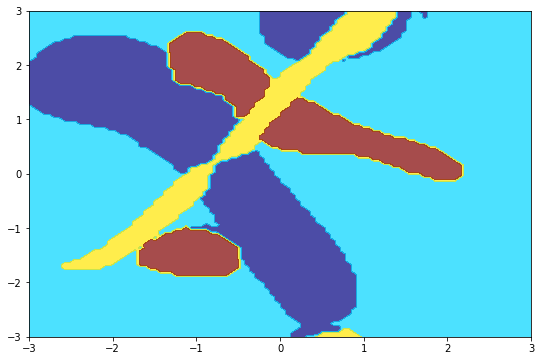

Точність класифікатора: 0.8342857142857143
Навчальна вибірка: 0.8342857142857143
Тестова вибірка: 0.81


In [ ]:
clf=SVC(C=1000)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X=None, y=y_train, meshgrid_dims=100)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')
print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

In [ ]:
 1 / (2 * X_train.var())

0.5

In [ ]:
X_train.var()

1.0

#**6. Оцінка якості моделі за допомогою перехресної перевірки**

CPU times: user 48.7 ms, sys: 0 ns, total: 48.7 ms
Wall time: 50.9 ms


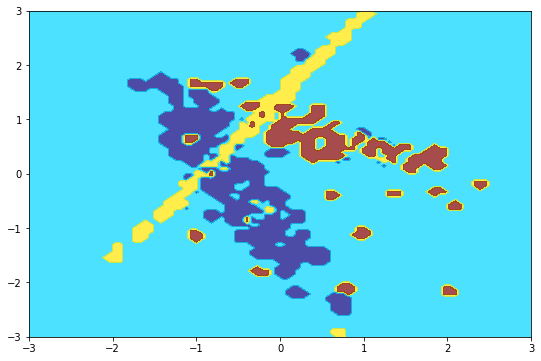

Точність класифікатора: 0.98
Навчальна вибірка: 0.98
Тестова вибірка: 0.6966666666666667


In [ ]:
clf=SVC(C=100, gamma=100)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X=None, y=y_train, meshgrid_dims=100)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')
print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

In [ ]:
res_cv=cross_val_score(clf,X_train, y_train)
print (res_cv)
print (f'Середнє значення: {res_cv.mean()}, стандартне відхилення: {res_cv.std()}')

[0.7        0.65714286 0.74285714 0.74285714 0.76428571]
Середнє значення: 0.7214285714285714, стандартне відхилення: 0.038332593899996395


#**7. Ручний підбір гіперпараметрів класифікатора**

CPU times: user 937 ms, sys: 3.2 ms, total: 940 ms
Wall time: 944 ms


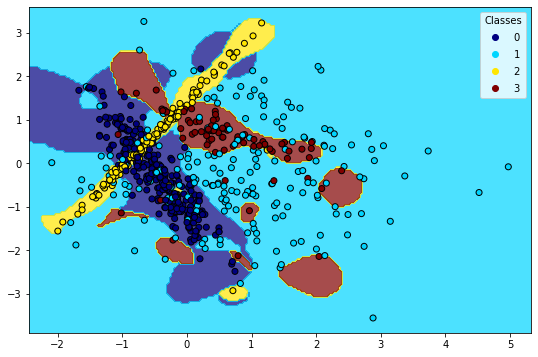

Точність класифікатора: 0.88
Навчальна вибірка: 0.88
Тестова вибірка: 0.8
[0.8        0.75714286 0.77857143 0.78571429 0.80714286]
Середнє значення: 0.7857142857142858, стандартне відхилення: 0.01749635530559415


In [ ]:
clf=SVC(C=10000, gamma=1)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X=X_train, y=y_train)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
res_cv=cross_val_score(clf,X_train, y_train)
print (res_cv)
print (f'Середнє значення: {res_cv.mean()}, стандартне відхилення: {res_cv.std()}')

CPU times: user 32.4 ms, sys: 54 µs, total: 32.4 ms
Wall time: 31.5 ms


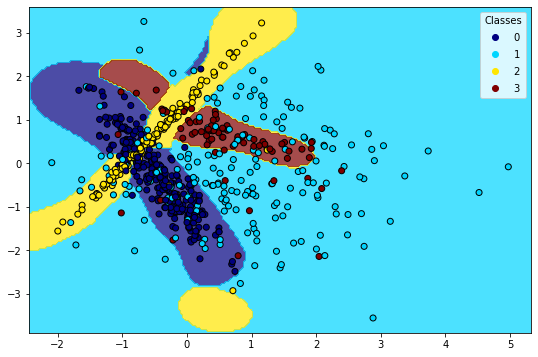

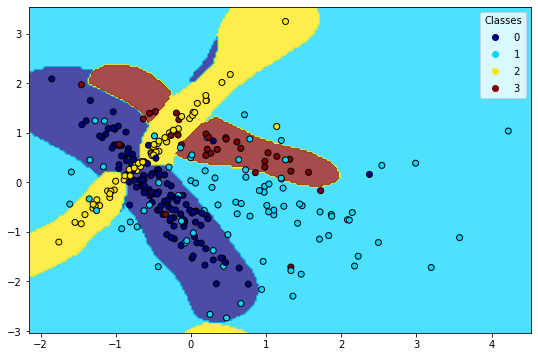

Точність класифікатора: 0.81
Навчальна вибірка: 0.81
Тестова вибірка: 0.8
[0.79285714 0.75       0.73571429 0.77857143 0.78571429]
Середнє значення: 0.7685714285714285, стандартне відхилення: 0.021946130708195996


In [ ]:
clf=SVC(C=10, gamma=1)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X=X_train, y=y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X=X_test, y=y_test)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
res_cv=cross_val_score(clf,X_train, y_train)
print (res_cv)
print (f'Середнє значення: {res_cv.mean()}, стандартне відхилення: {res_cv.std()}')

#**8. Автоматичний підбір параметрів**

CPU times: user 12.8 s, sys: 5.17 ms, total: 12.8 s
Wall time: 12.7 s
Оптимальні параметри {'C': 10000, 'gamma': 'scale'}
Усереднена точність 0.8085714285714285
Навчальна вибірка: 0.85
Тестова вибірка: 0.81


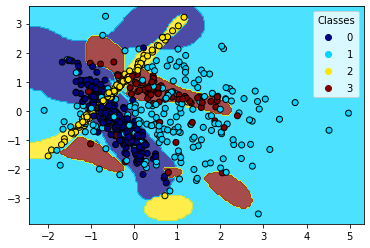

In [ ]:
clf=SVC()
param_grid={'C': [0.1, 10, 100, 1000, 10000], 'gamma': (0.01, 0.1, 1, 'scale')}
clf=GridSearchCV(clf,param_grid)
%time clf.fit(X_train, y_train)
print (f'Оптимальні параметри {clf.best_params_}')
print (f'Усереднена точність {clf.best_score_}')
print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
decision_surface(clf, X=X_train, y=y_train)

#**9. Оцінювання побудованої моделі класифікатора різними метриками якості**

In [ ]:
y_pred=clf.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.93      0.86       118
     class 1       0.89      0.64      0.75        87
     class 2       0.84      0.97      0.90        61
     class 3       0.62      0.53      0.57        34

    accuracy                           0.81       300
   macro avg       0.79      0.77      0.77       300
weighted avg       0.81      0.81      0.80       300



#**10. Додаткове завдання для самостійного виконання**

CPU times: user 19.1 s, sys: 9.41 s, total: 28.6 s
Wall time: 16.6 s
Оптимальні параметри {'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.01}
Усереднена точність 0.7957142857142858
Навчальна вибірка: 0.8314285714285714
Тестова вибірка: 0.8


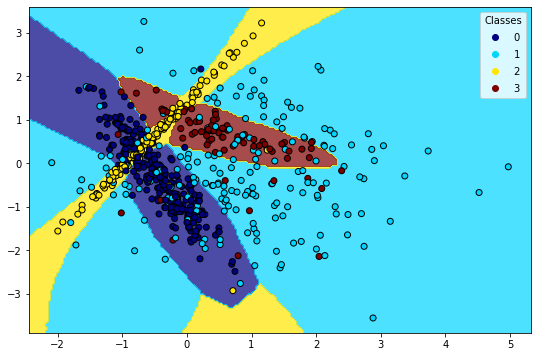

              precision    recall  f1-score   support

     class 0       0.79      0.93      0.85       118
     class 1       0.92      0.55      0.69        87
     class 2       0.83      0.97      0.89        61
     class 3       0.62      0.68      0.65        34

    accuracy                           0.80       300
   macro avg       0.79      0.78      0.77       300
weighted avg       0.82      0.80      0.79       300



In [ ]:
clf=MLPClassifier()

param_grid={'hidden_layer_sizes': [(10,),(10,10), (100,), (100,100), (100,100,100)], 'learning_rate_init': (0.001,0.01, 0.1, 1), 'early_stopping':[True]}
clf=GridSearchCV(clf,param_grid)
%time clf.fit(X_train, y_train)

print (f'Оптимальні параметри {clf.best_params_}')
print (f'Усереднена точність {clf.best_score_}')
print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train, proba=False)
y_pred=clf.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
